In [23]:
import numpy as np
import matplotlib.animation as animation

def animate(iter):
    time_step()
    z = state_mat()
    line.set_array(z.ravel())
    ax.set_title('%i'%iter)
    return line


def state_mat():
  z_array=np.zeros((N,N))
  global lattice
  for i in range(N):
    for j in range(N):
      z_array[i,j]=lattice[i,j].state
  return z_array

def initialize(N,time):
  global lattice,punished
  punished=[]
  choice=np.arange(N)
  Q_list=np.zeros(time)
  lattice = np.empty( (N,N), dtype=object)
  for i in range(N):
    for j in range(N):
      lattice[i,j]=player(i,j,pay_off)


def time_step():
  global lattice
  punish_func()
  for i in range(N):
    for j in range(N):
      game(lattice[i,j],lattice[(i+1)%N,j])
      game(lattice[i,j],lattice[i,(j+1)%N])
  comp_mutation()
  zero_reward()

def comp_mutation():
  global lattice,Q,beta,p,r
  Q=0
  for i in range(N):
    for j in range(N):
      if np.random.rand()<p:
        lattice[i,j].mutation()
      else:
        lattice[i,j].comparison(beta,choice,lattice)
      
      Q+=lattice[i,j].state

      #for mercy:  
      if ((i,j) in punished) and (lattice[i,j].state==1) and (np.random.rand()<(1-r)):
        punished.remove((i,j))
        lattice[i,j].pay_off_mat=pay_off


def game(player1,player2):
  player1.reward+=player1.pay_off_mat[player1.state,player2.state]
  player2.reward+=player2.pay_off_mat[player2.state,player1.state]

def punish_func():
  global N,lattice,r,punish_mat
  for i in range(N):
    for j in range(N):
      if (lattice[i,j].state==0) and ((i,j) not in punished) and np.random.rand()<r:
        punished.append((i,j))
        lattice[i,j].punish(punish_mat)
        lattice[i,j].punish(punish_mat)

def zero_reward():
  global lattice,N
  for i in range(N):
    for j in range(N):
      lattice[i,j].reward=0

class player:
  count=0
  def __init__(self,x,y,pay_off):
    self.x=x
    self.y=y
    self.pay_off_mat=pay_off
    self.reward=0
    self.state=np.random.choice([1,0])
    player.count+=1

  def comparison(self,beta,choice,lattice):
    
    x_cor=np.random.choice(choice)
    if x_cor!=self.x:
      y_cor=np.random.choice(choice)
    else:
      y_cor=np.random.choice(choice[choice!=self.y])
    if self.reward<=lattice[x_cor,y_cor].reward:
      self.state=lattice[x_cor,y_cor].state
    elif np.random.rand()<np.exp(-beta*(self.reward-lattice[x_cor,y_cor].reward)):
      self.state=lattice[x_cor,y_cor].state
 
  def mutation(self):

    if self.state==1:
      self.state=0
    else:
      self.state=1
  
  def punish(self,punish_game):
    self.pay_off_mat=punish_game
    self.reward=0

pay_off=np.array([[2,10],[0,8]])
#pay_off=np.array([[2,5],[0,12]]) #cooperation pay off 
punish_mat=np.zeros((2,2))
global N
N=10
time=200
ensemble=10
#beta_list=np.array([1])

#beta_list=np.linspace(0,1,30)

p=0.05
#r=0.01
r_list=np.linspace(0,1,20)
beta_list=np.linspace(0,1,11)
print(beta_list)
choice=np.arange(N,dtype=np.dtype('i'))

for counter,beta in enumerate(beta_list):
    print('beta=',beta)
    for r in r_list:
      print('r=',r)
  
      Q_list=np.zeros(time)
      for e in range(ensemble):
        initialize(N,time)
        for t in range(time):
          time_step()
          Q_list[t]+=Q
    
  
      Q_list/=(ensemble*N*N)
      np.savetxt('C:\\Users\\alise\\Dropbox\\simu in physics\\HW-10\\Game Theory\\zero reward\\r, p=0.05\\beta=%0.2f,r=%0.2f.csv'%(beta,r),Q_list)

#animation:
'''
fig = plt.figure(figsize=(5,5),facecolor='white')
y_array, x_array = np.meshgrid(np.arange(N), np.arange(N))
z = state_mat()  
ax= plt.subplot()
line = ax.pcolormesh(x_array,y_array,z)
anim = animation.FuncAnimation(fig,animate,frames=time,interval=50,blit=False,repeat=False)
from IPython.display import HTML
HTML(anim.to_jshtml())
'''
print('finish')

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
beta= 0.0
r= 0.0
r= 0.05263157894736842
r= 0.10526315789473684
r= 0.15789473684210525
r= 0.21052631578947367
r= 0.2631578947368421
r= 0.3157894736842105
r= 0.3684210526315789
r= 0.42105263157894735
r= 0.47368421052631576
r= 0.5263157894736842
r= 0.5789473684210527
r= 0.631578947368421
r= 0.6842105263157894
r= 0.7368421052631579
r= 0.7894736842105263
r= 0.8421052631578947
r= 0.894736842105263
r= 0.9473684210526315
r= 1.0
beta= 0.1
r= 0.0
r= 0.05263157894736842
r= 0.10526315789473684
r= 0.15789473684210525
r= 0.21052631578947367
r= 0.2631578947368421
r= 0.3157894736842105
r= 0.3684210526315789
r= 0.42105263157894735
r= 0.47368421052631576
r= 0.5263157894736842
r= 0.5789473684210527
r= 0.631578947368421
r= 0.6842105263157894
r= 0.7368421052631579
r= 0.7894736842105263
r= 0.8421052631578947
r= 0.894736842105263
r= 0.9473684210526315
r= 1.0
beta= 0.2
r= 0.0
r= 0.05263157894736842
r= 0.10526315789473684
r= 0.15789473684210525
r= 0.210526315789473

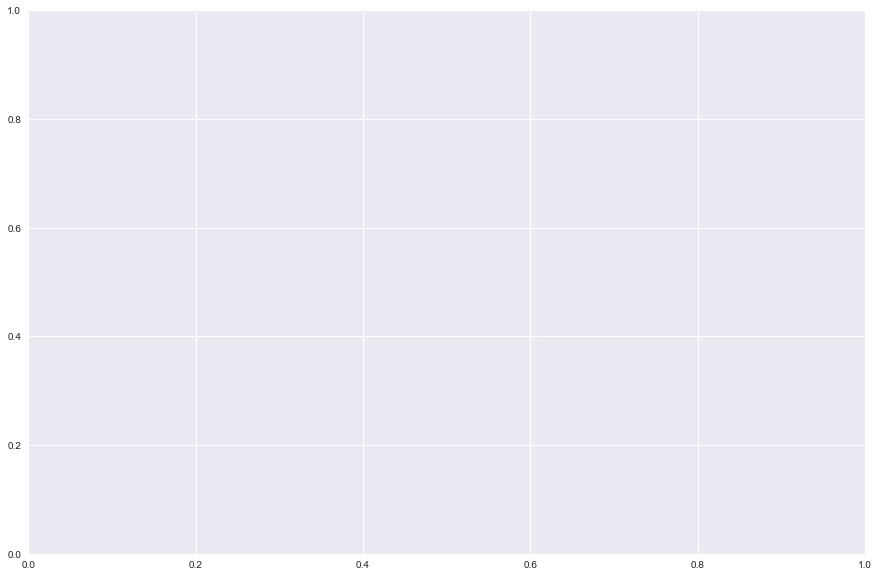

In [24]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
for beta in beta_list: 
    for r in r_list:
        array=np.loadtxt('C:\\Users\\alise\\Dropbox\\simu in physics\\HW-10\\Game Theory\\zero reward\\r, p=0.05\\data\\beta=%0.2f,r=%0.2f.csv'%(beta,r))
        plt.plot(array,label='r=%f'%r)   
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('Q')
    plt.title('Q vs time for L=%i, beta=%.2f, p=%0.2f'%(N*N,beta,p))    
    plt.savefig('C:\\Users\\alise\\Dropbox\\simu in physics\\HW-10\\Game Theory\\zero reward\\r, p=0.05\\figures\\Q vs t\\L=%i,beta=%0.2f, p=%.2f.png'%(N,beta,p),bbox_inches="tight")
    plt.cla()

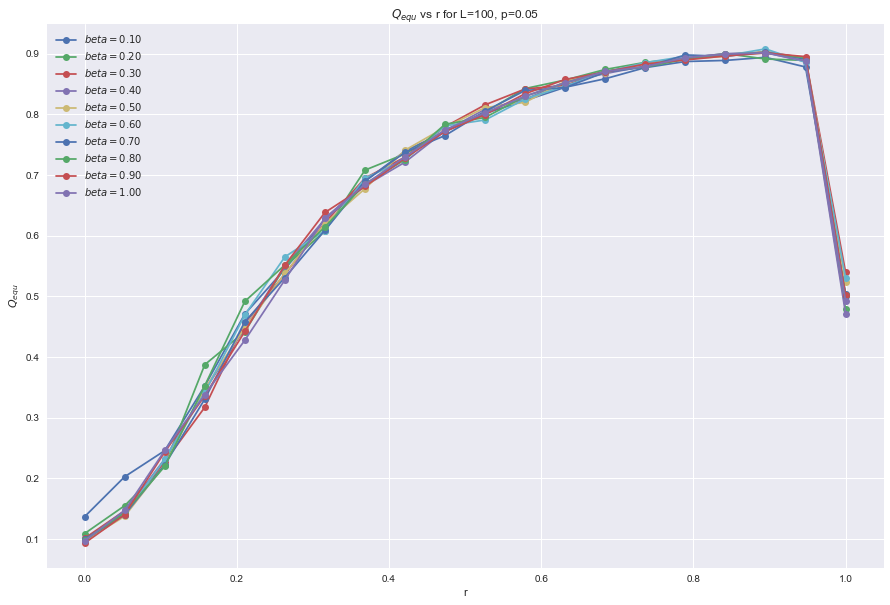

In [25]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
for beta in beta_list: 
    l=[]
    for r in r_list:
        array=np.loadtxt('C:\\Users\\alise\\Dropbox\\simu in physics\\HW-10\\Game Theory\\zero reward\\r, p=0.05\\data\\beta=%0.2f,r=%0.2f.csv'%(beta,r))
        l.append(np.mean(array[-50:]))
    if beta!=0:
        plt.plot(r_list,l,'-o',label='$beta = %0.2f$'%beta)

plt.xlabel('r')
plt.ylabel('$Q_{equ}$')
plt.title('$Q_{equ}$ vs r for L=%i, p=%0.2f'%(N*N,p))    
plt.legend()
plt.savefig('C:\\Users\\alise\\Dropbox\\simu in physics\\HW-10\\Game Theory\\zero reward\\r, p=0.05\\figures\\equilibrium Q vs r\\equ Q, p=%0.2f.png'%(p),bbox_inches="tight")
    #plt.cla()